# Jak wykonać dowolną operację na każdej komórce?

In [1]:
import pandas as pd

# Czasami zdarza się, że w jednej kolumnie mamy dane, które wymagają nietypowego procesowania, np. rozważmy poniższą kolumnę:

df = pd.DataFrame({
    'id': [1, 2, 3],
    'sex_age': ['M25', 'F48', 'M9'],
})  # ✅ w ten sposób możesz ręcznie stworzyć DataFrame

df

,id,sex_age
0,1,M25
1,2,F48
2,3,M9


In [2]:
# Zazwyczaj takie dane trzeba najpierw wyczyścić, tzn. rodzielić kolumnę sex_age na dwie osobne kolumny.
# W tym celu wyciągamy interesującą nas kolumnę:

df['sex_age']

0    M25
1    F48
2     M9
Name: sex_age, dtype: object

In [3]:
# i wywołujemy metodę .map() przekazując jaka funkcja ma być wywołana na każdym elemencie:

def get_sex(sex_age: str) -> str:  # tutaj otrzymujemy pojedycznego stringa, nie całą kolumnę!
    return sex_age[0]

df['sex_age'].map(get_sex)

0    M
1    F
2    M
Name: sex_age, dtype: object

In [4]:
# Rezultat doklejamy do DataFrame przy pomocy znanej Ci już metody .assign():

def get_sex(sex_age: str) -> str:
    return sex_age[0]

def get_age(sex_age: str) -> int:
    return int(sex_age[1:])

new_df = df.assign(
    sex=lambda x: x['sex_age'].map(get_sex),
    age=lambda x: x['sex_age'].map(get_age),
)
new_df

,id,sex_age,sex,age
0,1,M25,M,25
1,2,F48,F,48
2,3,M9,M,9


In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3 non-null      int64 
 1   sex_age  3 non-null      object
 2   sex      3 non-null      object
 3   age      3 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 224.0+ bytes


In [6]:
# Jeśli się uprzesz, to możesz nawet zrobić to zagnieżdżonymi lambdami, ale nie polecam tego rozwiązania, bo robi się ono skomplikowane:

new_df = df.assign(
    sex=lambda x: x['sex_age'].map(lambda sex_age: sex_age[0]),
    age=lambda x: x['sex_age'].map(lambda sex_age: int(sex_age[1:])),
)
new_df

,id,sex_age,sex,age
0,1,M25,M,25
1,2,F48,F,48
2,3,M9,M,9


# 🔴 Ćwiczenie

W poprzednim ćwiczeniu usunęliśmy separator tysięcy `,` przy pomocy argumentu `thousands` funkcji `pd.read_csv`. Jak zrobisz to bez pomocy tego argumentu, używając metody map?

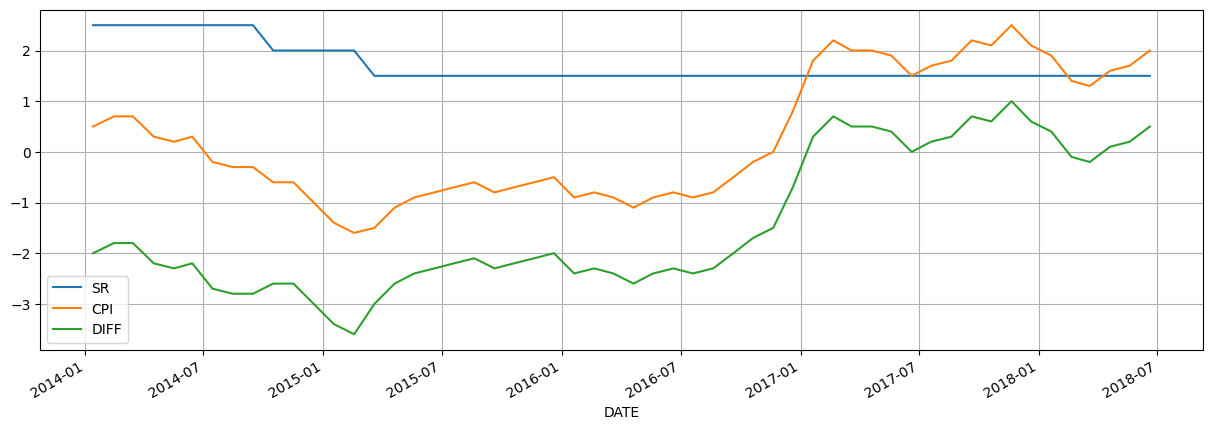

In [4]:
import pandas as pd
import matplotlib.pyplot

def remove_thousands_separator(data):
    return float(data.replace(',', ''))

macro = pd.read_csv (
        'data\macroeconomicsPL.csv',
        parse_dates=['DATE'],
        index_col='DATE',
        dayfirst=True,
        skipfooter=3,
        engine="python",
        na_values={
            'SPD': '-99'
        },
).rename(columns={
    'sr_NBP': 'SR',
    'WIBOR 3M': 'WIBOR'
}).assign(
    DIFF=lambda x: x['CPI'] - x['SR'],
    RB=lambda x: x['RB'].map(remove_thousands_separator),
)
macro['2014':'2018 6'].plot(
    y=['SR', 'CPI', 'DIFF'],
    figsize=(15,5),
    grid=True
);